<a href="https://colab.research.google.com/github/Manolo1109/Examen1_AnalisisCuantitativo/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np #Librería para manejar arreglos y vectores
import matplotlib.pyplot as plt #Librería para generación de gráficos
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

## Punto 1

In [ ]:
#boston = datasets.load_boston()
#boston

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
#target = raw_df.values[1::2, 2]

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [ ]:
df_punto1 = pd.DataFrame(data, columns=columns)
df_punto1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df_punto1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Punto 1.1

In [ ]:
punto1_X = df_punto1.drop(["MEDV"], axis = 1)
punto1_y = df_punto1[["MEDV"]]

In [ ]:
punto1_X_train, punto1_X_test, punto1_y_train, punto1_y_test = train_test_split(punto1_X, punto1_y, test_size=0.2, random_state=123)

In [ ]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
coefficients = []

In [ ]:
data_punto1_X = punto1_X.values
data_punto1_y = punto1_y.values

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=47)

model_ridge = RidgeCV(alphas=np.arange(0.1,10,0.1), cv = cv, scoring="neg_mean_absolute_error")

model_ridge.fit(data_punto1_X, data_punto1_y)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=47),
        scoring='neg_mean_absolute_error')

In [ ]:
model_ridge.alpha_

0.5

In [ ]:
model_ridge.coef_

array([[-1.05865684e-01,  4.70411564e-02,  2.25165173e-03,
         2.61211652e+00, -1.34162609e+01,  3.84075720e+00,
        -3.14417004e-03, -1.41149067e+00,  2.95989418e-01,
        -1.26863875e-02, -9.04760119e-01,  9.53768594e-03,
        -5.29832258e-01]])

In [ ]:
model_ridge_mejor_alpha = Ridge(alpha = 0.5)

scores = cross_val_score(model_ridge_mejor_alpha, data_punto1_X, data_punto1_y, cv = cv, scoring="neg_mean_absolute_error")

MAE = np.mean(-1*scores)
print(MAE)

3.3923094253401747


In [ ]:
model_ridge_mejor_alpha_fit = model_ridge_mejor_alpha.fit(data_punto1_X, data_punto1_y)
model_ridge_mejor_alpha_fit.coef_

array([[-1.05865684e-01,  4.70411564e-02,  2.25165173e-03,
         2.61211652e+00, -1.34162609e+01,  3.84075720e+00,
        -3.14417004e-03, -1.41149067e+00,  2.95989418e-01,
        -1.26863875e-02, -9.04760119e-01,  9.53768594e-03,
        -5.29832258e-01]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT')])

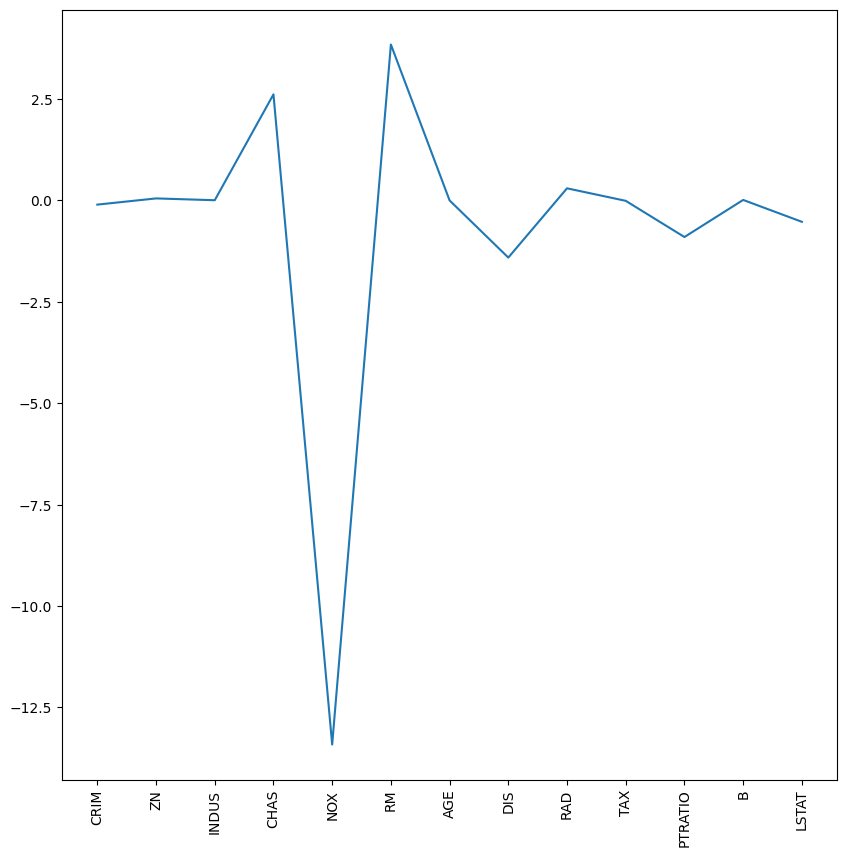

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(df_punto1.drop(["MEDV"], axis = 1).columns, model_ridge_mejor_alpha_fit.coef_[0])
plt.xticks(rotation = 90)

In [ ]:
#Aplicar lasso para penalizar variables
model_lasso = LassoCV(alphas=np.arange(0.00001,0.00100,0.001), cv = cv)
model_lasso.fit(data_punto1_X, data_punto1_y)
print(model_lasso.alpha_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1e-05


In [ ]:
model_lasso_mejor_alpha = Lasso(alpha = 0.00001)

model_lasso_mejor_alpha_fit = model_lasso_mejor_alpha.fit(data_punto1_X, data_punto1_y)

In [ ]:
model_lasso_mejor_alpha_fit.coef_

array([-1.08009572e-01,  4.64208883e-02,  2.05445420e-02,  2.68655153e+00,
       -1.77632326e+01,  3.80987004e+00,  6.89636021e-04, -1.47551377e+00,
        3.06041919e-01, -1.23348858e-02, -9.52710787e-01,  9.31185808e-03,
       -5.24764001e-01])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT')])

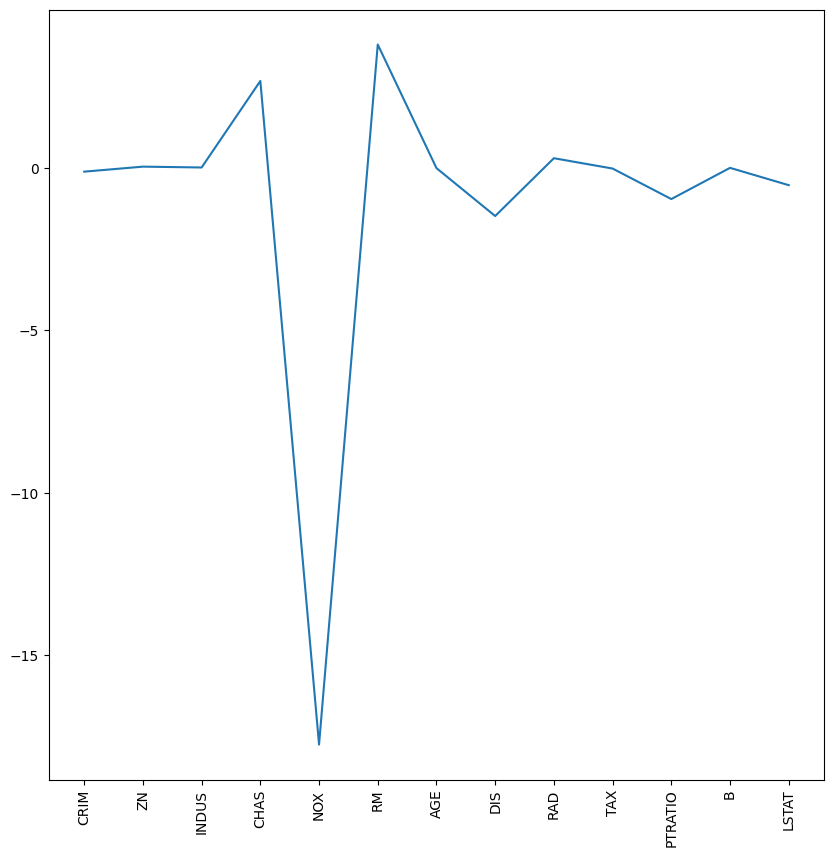

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(df_punto1.drop(["MEDV"], axis = 1).columns, model_lasso_mejor_alpha_fit.coef_)
plt.xticks(rotation = 90)

In [ ]:
for alpha in alphas:
    punto1_model = Ridge(alpha=alpha)
    punto1_model.fit(punto1_X_train, punto1_y_train)
    coefficients.append(punto1_model.coef_)

coefficients = np.array(coefficients)

In [ ]:
grid_search = GridSearchCV(punto1_model, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search

GridSearchCV(cv=5, estimator=Ridge(alpha=100.0),
             param_grid=[0.01, 0.1, 1.0, 10.0, 100.0],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(punto1_X_train, punto1_y_train)


TypeError: ignored

In [ ]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

0.1

In [ ]:
best_model = grid_search.best_estimator_
best_model

Ridge(alpha=0.1)

## Punto 2

In [ ]:
df_punto2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip", header=None)
df_punto2

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [ ]:
df_punto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [ ]:
df_punto2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
...,...,...,...,...,...,...,...,...
86,515345.0,17.669213,114.427905,-3168.92457,-31.58061,15.59847,67.79496,3662.06565
87,515345.0,-26.315336,173.977336,-4319.99232,-101.53030,-21.20412,52.38933,2833.60895
88,515345.0,4.458641,13.346557,-236.03926,-2.56609,3.11764,9.96774,463.41950
89,515345.0,20.035136,185.558247,-7458.37815,-59.50927,7.75973,86.35161,7393.39844


## Punto 3

In [ ]:
california_housing = datasets.fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
punto3_X = california_housing.data
punto3_y = california_housing.target

In [ ]:
punto3_y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])